Plotting results from the CountSketch algorithm 

Found estimate files: ['estimates_t10.csv', 'estimates_t15.csv', 'estimates_t17.csv', 'estimates_t20.csv']
Found median files: ['medians_t10.csv', 'medians_t15.csv', 'medians_t17.csv', 'medians_t20.csv']


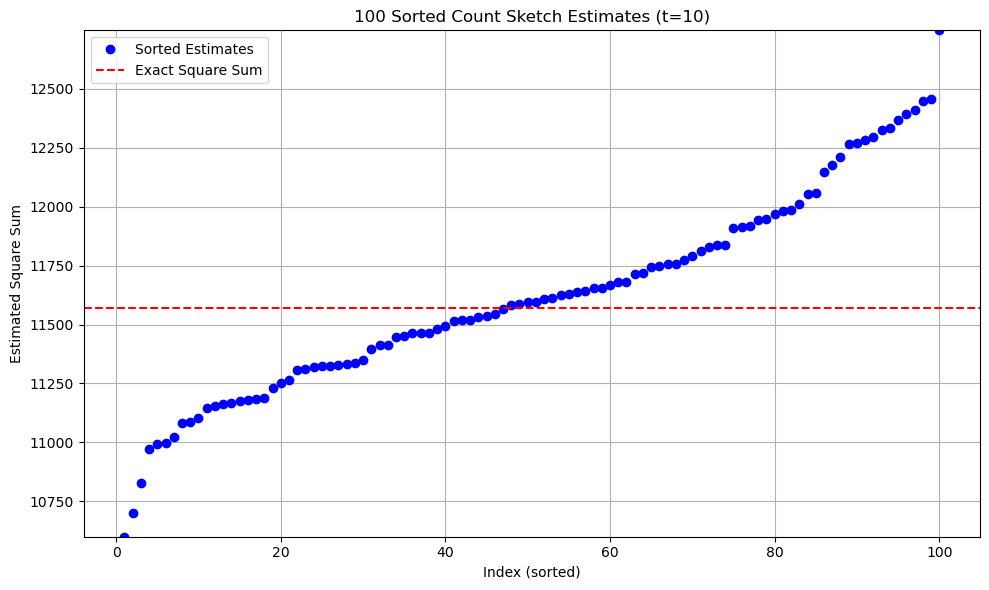

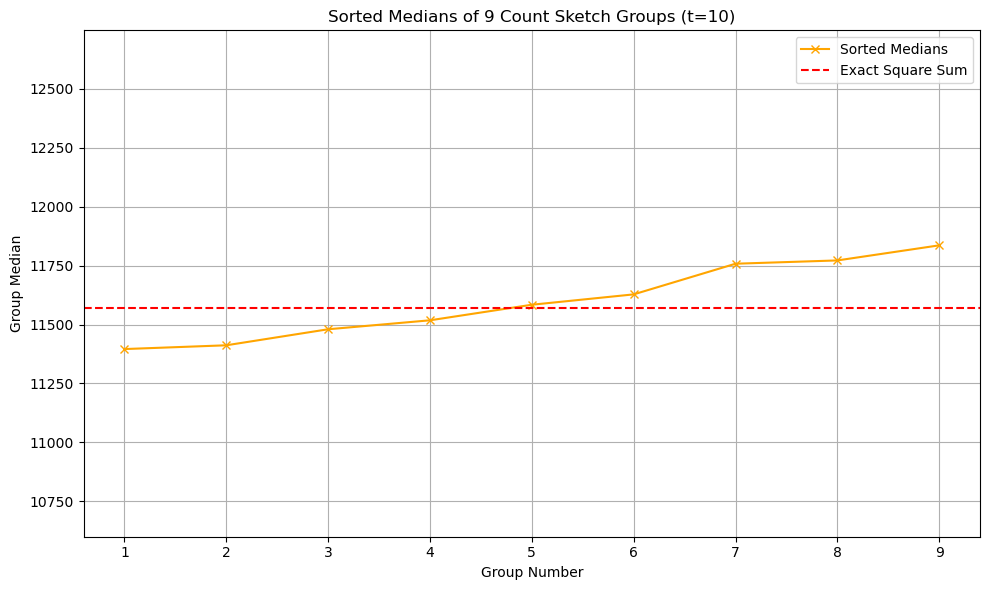

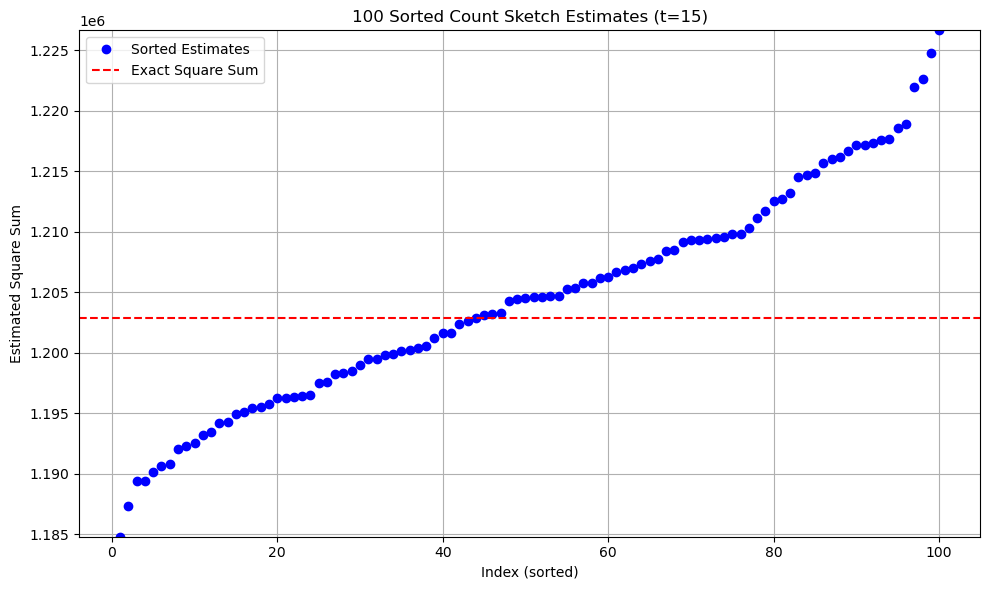

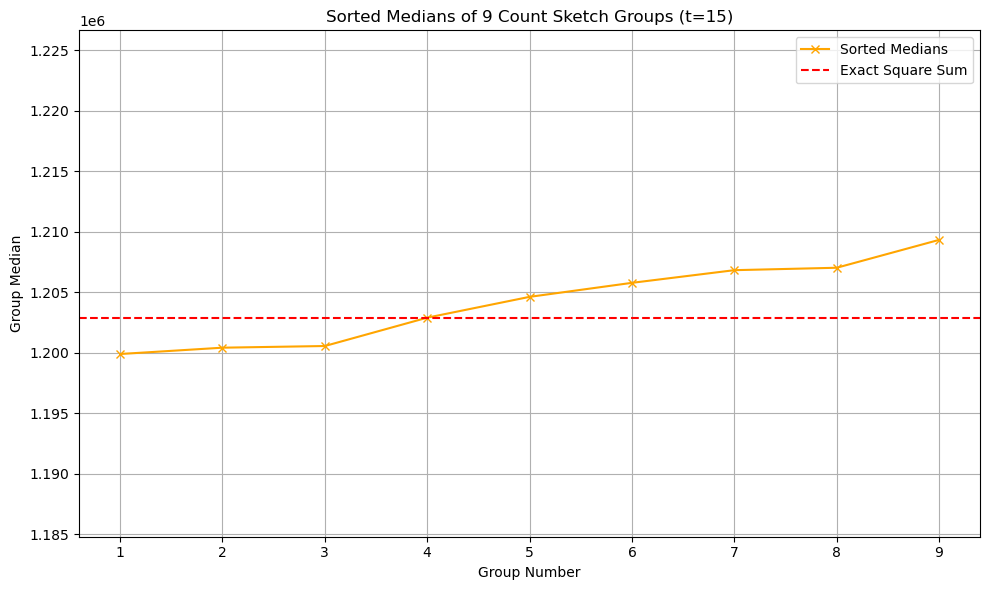

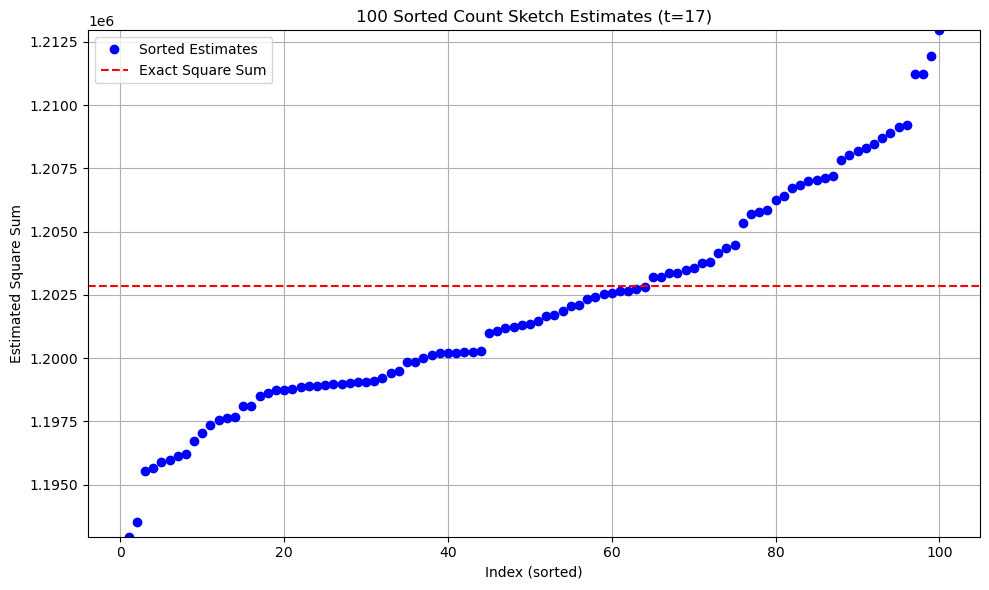

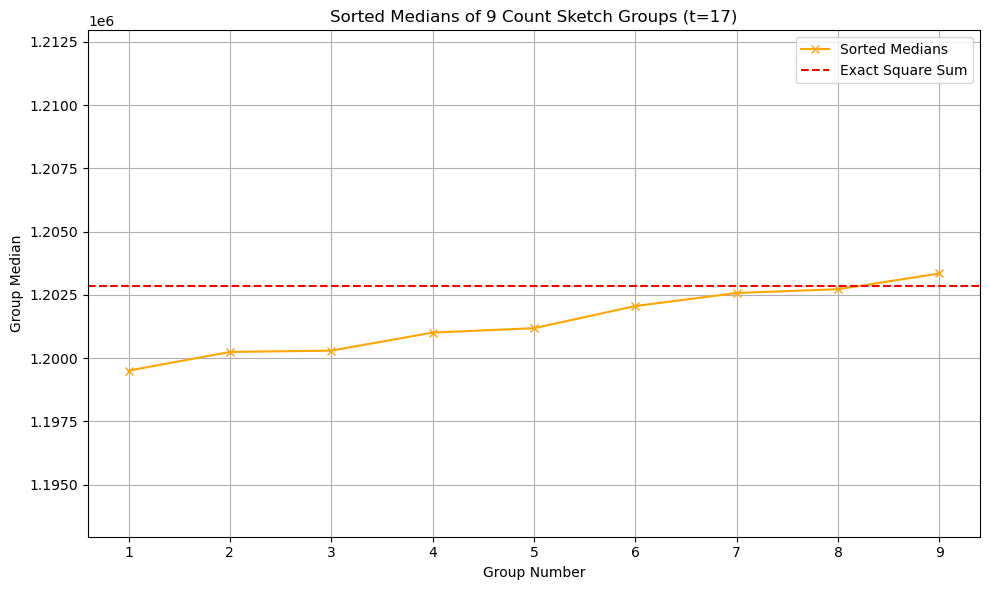

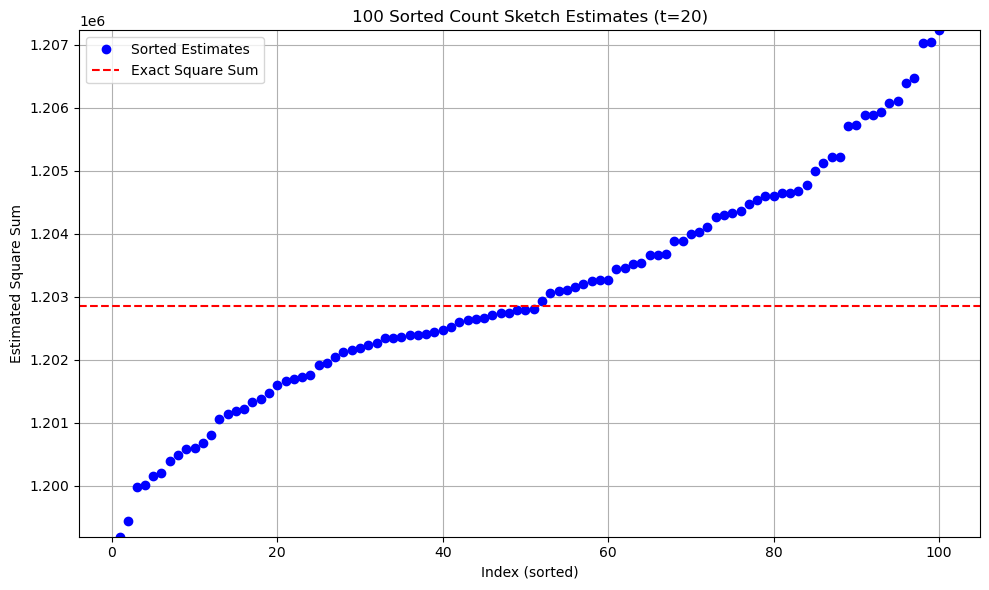

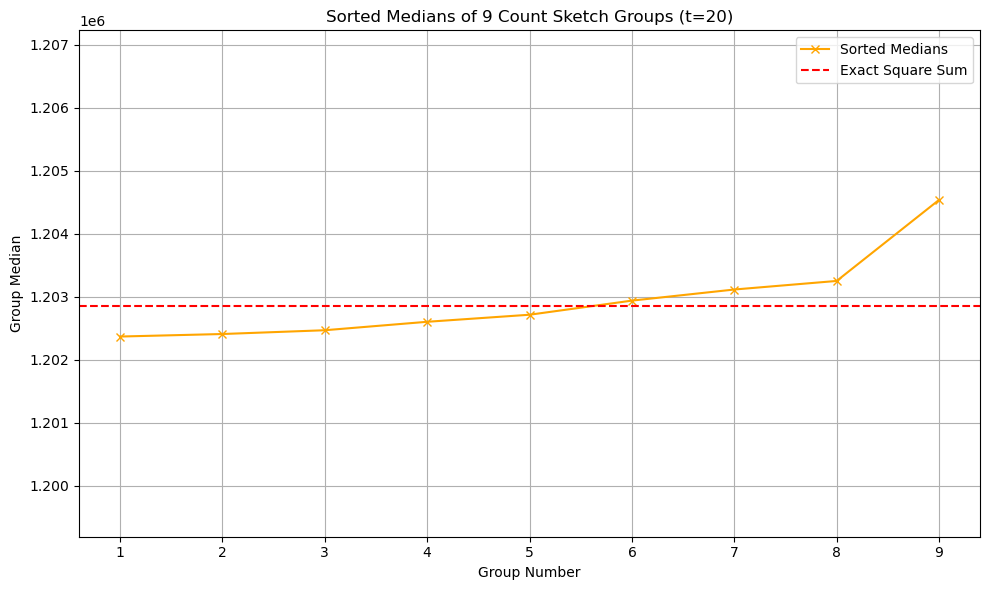

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

# Filstier
# Find all files matching the pattern 'estimates_t[some number].csv'
estimate_files = glob.glob('estimates_t*.csv')
print("Found estimate files:", estimate_files)

median_files = glob.glob('medians_t*.csv')
print("Found median files:", median_files)

for estimateFilePath, medianFilePath in zip(estimate_files, median_files):
    estimates = pd.read_csv(estimateFilePath, index_col='Index')
    medians = pd.read_csv(medianFilePath, index_col='Index')

    # Hent S_exact og fjern den fra data
    if -1 in estimates.index:
        S_exact = estimates.loc[-1, "EstimatedSquareSum"]
        estimates = estimates.drop(index=-1)
    else:
        raise ValueError("S_exact mangler i estimates.csv")

    if -1 in medians.index:
        medians = medians.drop(index=-1)

    # ░░░░░░ PLOT 1: Sorted estimates ░░░░░░
    t = estimateFilePath.split('estimates_t')[-1].split('.csv')[0]

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 101), estimates, marker='o', linestyle='', color='blue', label='Sorted Estimates')
    plt.axhline(S_exact, color='red', linestyle='--', label='Exact Square Sum')
    plt.title(f"100 Sorted Count Sketch Estimates (t={t})")
    plt.xlabel("Index (sorted)")
    plt.ylabel("Estimated Square Sum")
    plt.ylim(estimates["EstimatedSquareSum"].min(), estimates["EstimatedSquareSum"].max())
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # ░░░░░░ PLOT 2: Medians from medians.csv ░░░░░░

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 10), medians, marker='x', linestyle='-', color='orange', label='Sorted Medians')
    plt.axhline(S_exact, color='red', linestyle='--', label='Exact Square Sum')
    plt.title(f"Sorted Medians of 9 Count Sketch Groups (t={t})")
    plt.xlabel("Group Number")
    plt.ylabel("Group Median")
    plt.ylim(estimates["EstimatedSquareSum"].min(), estimates["EstimatedSquareSum"].max())
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
